<a href="https://colab.research.google.com/github/Homeash-github/Data-Analysis/blob/main/Video_Game_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

Day 02


In [ ]:
data = pd.read_csv('/content/vgsales.csv')
data.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
data.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [ ]:
missing_values = data['Year'].isna().sum()
print(f"Number of missing values in Year column: {missing_values}")

Number of missing values in Year column: 271


In [ ]:
data.dropna(subset=['Year'],inplace=True)

In [ ]:
data['Year'] = data['Year'].astype('int64')

In [ ]:
data['Year'].dtypes

dtype('int64')

In [ ]:
missing_values = data['Year'].isna().sum()
print(f"Number of missing values in Year column: {missing_values}")

Number of missing values in Year column: 0


Day 03

In [ ]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000
mean,8292.868194,2006.406443,0.265415,0.147554,0.078661,0.048325,0.540232
std,4792.669778,5.828981,0.821591,0.508766,0.311557,0.189885,1.565732
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4136.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8295.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12441.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
data_filtered = data[data['Year'] > 2010]

In [ ]:
unique_platforms = data['Platform'].unique()
print("Unique platforms:")
for i in unique_platforms:
  print(i)


Unique platforms:
Wii
NES
GB
DS
X360
PS3
PS2
SNES
GBA
3DS
PS4
N64
PS
XB
PC
2600
PSP
XOne
GC
WiiU
GEN
DC
PSV
SAT
SCD
WS
NG
TG16
3DO
GG
PCFX


In [ ]:
unique_genre = data['Genre'].unique()
print("Unique Genre:")
for i in unique_genre:
  print(i)


Unique Genre:
Sports
Platform
Racing
Role-Playing
Puzzle
Misc
Shooter
Simulation
Action
Fighting
Adventure
Strategy


In [ ]:
genre_counts = data['Genre'].value_counts().to_frame(name='Count')
print(genre_counts)

              Count
Genre              
Action         3253
Sports         2304
Misc           1710
Role-Playing   1471
Shooter        1282
Adventure      1276
Racing         1226
Platform        876
Simulation      851
Fighting        836
Strategy        671
Puzzle          571


In [ ]:
data_sorted = data.groupby('Genre').size().to_frame(name='count').sort_values(by='count', ascending=False)

Day 04

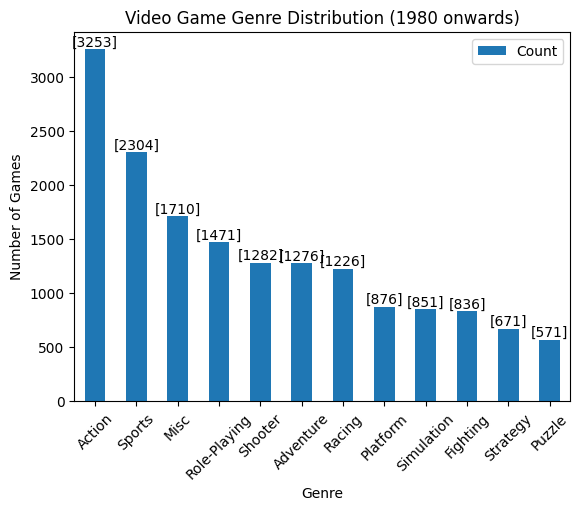

In [ ]:
import matplotlib.pyplot as plt
genre_counts.index = genre_counts.index.astype(str)
genre_counts.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.title('Video Game Genre Distribution (1980 onwards)')
plt.xticks(rotation=45)
for i, value in enumerate(genre_counts.values):
    plt.text(i, value, str(value), ha='center', va='bottom')
plt.show()

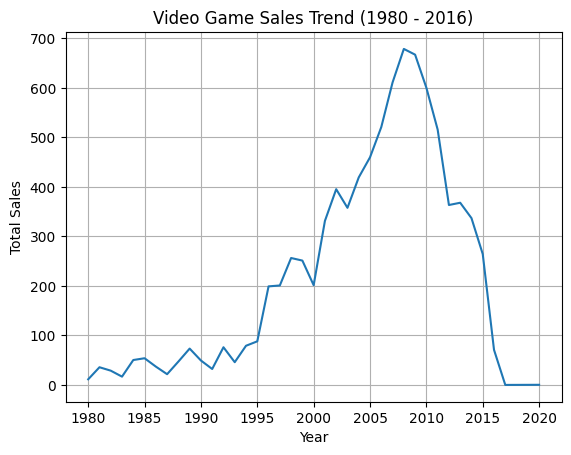

In [ ]:
import matplotlib.pyplot as plt
data_by_year = data.groupby('Year')['Global_Sales'].sum().reset_index()
years = data_by_year['Year']
sales = data_by_year['Global_Sales']
plt.plot(years, sales)
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Video Game Sales Trend (1980 - 2016)')
plt.grid(True)
plt.show()

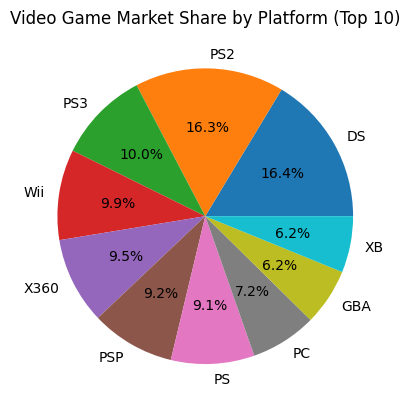

In [ ]:
import matplotlib.pyplot as plt
top_10_counts = platform_counts.head(10)
top_10_platforms = top_10_counts.index.to_numpy()
plt.pie(top_10_counts, labels=top_10_platforms, autopct="%1.1f%%")
plt.title('Video Game Market Share by Platform (Top 10)')
plt.show()